In [1]:
import pandas as pd
import numpy as np
import pickle
import pandas_datareader as pdr
import scipy as sp
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats 

## Fuzzy matching

In [2]:
raw_data = pd.read_csv('RAWDATA - USESGM_Worksheet.csv')
raw_data.head()

C:\Program1\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,AS_OF_DATE,ISSUER_NAME,ISSUERID,ISSUER_TICKER,ISSUER_CUSIP,ISSUER_SEDOL,ISSUER_ISIN,ISSUER_CNTRY_DOMICILE,IVA_INDUSTRY,IVA_PREVIOUS_RATING,IVA_RATING_TREND,INDUSTRY_ADJUSTED_SCORE,Sector_n,ESG_MOM_1Y,yr_n
0,0,2012-11-01,"Cinemark Holdings, Inc.",IID000000002123682,CNK,17243V102,B1W7RQ0,US17243V1026,US,Movies & Entertainment,NaN,NaN,5.9,4,1.000000e-12,2012
1,1,2012-11-02,"Cinemark Holdings, Inc.",IID000000002123682,CNK,17243V102,B1W7RQ0,US17243V1026,US,Movies & Entertainment,NaN,NaN,5.9,4,1.000000e-12,2012
2,2,2012-11-03,"Cinemark Holdings, Inc.",IID000000002123682,CNK,17243V102,B1W7RQ0,US17243V1026,US,Movies & Entertainment,NaN,NaN,5.9,4,1.000000e-12,2012
3,3,2012-11-04,"Cinemark Holdings, Inc.",IID000000002123682,CNK,17243V102,B1W7RQ0,US17243V1026,US,Movies & Entertainment,NaN,NaN,5.9,4,1.000000e-12,2012
4,4,2012-11-05,"Cinemark Holdings, Inc.",IID000000002123682,CNK,17243V102,B1W7RQ0,US17243V1026,US,Movies & Entertainment,NaN,NaN,5.9,4,1.000000e-12,2012


In [3]:
stock = pd.read_excel('ESGMNUS - July30.xlsx')

In [4]:
mxus = pd.read_csv('MXUS_Index.csv')
mxus.head()

,Unnamed: 0,Active Weight (%),Asset ID,Asset Name,Bmk Weight (%),Country Of Exposure,GICS Industry,GICS Industry Group,GICS Sector,GICS Sub-Industry,Holdings,Mkt Value,Price,Weight (%),yr_n
0,0,1.000000,593,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3.259496e+11,9.706082e+12,41.549258,1.000000,2012
1,1,0.029967,USAEVS1,EXXON MOBIL CORPORATION,0.0,USA,Oil Gas & Consumable Fuels,Energy,Energy,Integrated Oil & Gas,5.096576e+09,2.908616e+11,57.070000,0.029967,2012
2,2,0.023499,USAB1X1,APPLE INC,0.0,USA,Technology Hardware Storage & Peripherals,Technology Hardware & Equipment,Information Technology,Computer Hardware,9.067950e+08,2.280861e+11,251.530000,0.023499,2012
3,3,0.018713,USAJ471,MICROSOFT CORP,0.0,USA,Software,Software & Services,Information Technology,Systems Software,7.893415e+09,1.816275e+11,23.010000,0.018713,2012
4,4,0.017949,USAL6I1,PROCTER & GAMBLE CO,0.0,USA,Household Products,Household & Personal Products,Consumer Staples,Household Products,2.904593e+09,1.742175e+11,59.980000,0.017949,2012


In [5]:
data1 = list(mxus['Asset Name'].unique())[1:]

In [6]:
data2 = list(raw_data['ISSUER_NAME'].unique())

In [22]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [31]:
data1_list = []
data2_list = []
data2_score = []


for i in range(len(data1)):
    highest = process.extractOne(data1[i],data2)
    data2_list.append(highest[0])
    data2_score.append(highest[1])
    data1_list.append(data1[i])
    
    if i%50==0:
        print(i)
        

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850


In [29]:
data1_list

['EXXON MOBIL CORPORATION', 'APPLE INC']

In [7]:
data = pd.DataFrame()
data2 = pd.DataFrame()
raw_data = pd.read_csv('RAWDATA - USESGM_Worksheet.csv')
mxus = pd.read_csv('MXUS_Index.csv')

data['company_from_rawdata'] = raw_data['ISSUER_NAME'].unique()
data2['company_from_mxus'] = mxus['Asset Name'].unique()

## Find the stocks with highest ESG 

In [8]:
raw_data.head()

,Unnamed: 0,AS_OF_DATE,ISSUER_NAME,ISSUERID,ISSUER_TICKER,ISSUER_CUSIP,ISSUER_SEDOL,ISSUER_ISIN,ISSUER_CNTRY_DOMICILE,IVA_INDUSTRY,IVA_PREVIOUS_RATING,IVA_RATING_TREND,INDUSTRY_ADJUSTED_SCORE,Sector_n,ESG_MOM_1Y,yr_n
0,0,2012-11-01,"Cinemark Holdings, Inc.",IID000000002123682,CNK,17243V102,B1W7RQ0,US17243V1026,US,Movies & Entertainment,NaN,NaN,5.9,4,1.000000e-12,2012
1,1,2012-11-02,"Cinemark Holdings, Inc.",IID000000002123682,CNK,17243V102,B1W7RQ0,US17243V1026,US,Movies & Entertainment,NaN,NaN,5.9,4,1.000000e-12,2012
2,2,2012-11-03,"Cinemark Holdings, Inc.",IID000000002123682,CNK,17243V102,B1W7RQ0,US17243V1026,US,Movies & Entertainment,NaN,NaN,5.9,4,1.000000e-12,2012
3,3,2012-11-04,"Cinemark Holdings, Inc.",IID000000002123682,CNK,17243V102,B1W7RQ0,US17243V1026,US,Movies & Entertainment,NaN,NaN,5.9,4,1.000000e-12,2012
4,4,2012-11-05,"Cinemark Holdings, Inc.",IID000000002123682,CNK,17243V102,B1W7RQ0,US17243V1026,US,Movies & Entertainment,NaN,NaN,5.9,4,1.000000e-12,2012


In [385]:
#return some columns
raw_data = raw_data[['AS_OF_DATE','ISSUER_NAME','ISSUER_TICKER','IVA_INDUSTRY','ESG_MOM_1Y','yr_n','Sector_n']]
raw_data.head()

,AS_OF_DATE,ISSUER_NAME,ISSUER_TICKER,IVA_INDUSTRY,ESG_MOM_1Y,yr_n,Sector_n
0,2012-11-01,"Cinemark Holdings, Inc.",CNK,Movies & Entertainment,1.000000e-12,2012,4
1,2012-11-02,"Cinemark Holdings, Inc.",CNK,Movies & Entertainment,1.000000e-12,2012,4
2,2012-11-03,"Cinemark Holdings, Inc.",CNK,Movies & Entertainment,1.000000e-12,2012,4
3,2012-11-04,"Cinemark Holdings, Inc.",CNK,Movies & Entertainment,1.000000e-12,2012,4
4,2012-11-05,"Cinemark Holdings, Inc.",CNK,Movies & Entertainment,1.000000e-12,2012,4


In [386]:
# built a dictionary where the key is sector, the values are the corresponding companies
sector_dict = {}
for i in range(1,11):
    sector = list(raw_data[raw_data['Sector_n'] == i]['ISSUER_NAME'].unique())
    sector_dict[i] = sector
    
#open company mapping from old to new    
with open('company_dict.pickle', 'rb') as handle:
    company_dict = pickle.load(handle)

In [387]:
raw_data = raw_data[raw_data['ISSUER_NAME'].isin(list(company_dict.values()))]
raw_data['AS_OF_DATE'] = pd.to_datetime(raw_data['AS_OF_DATE'])
raw_data = raw_data.set_index('AS_OF_DATE')
ticker_list = list(raw_data['ISSUER_TICKER'].unique())
raw_data = raw_data.groupby(['ISSUER_TICKER','Sector_n','ISSUER_NAME']).resample('Y').agg({'ESG_MOM_1Y':'mean'}).reset_index()
time_list = ['201'+str(x)+'-12-31' for x in range(2,9)]
raw_data.head()

,ISSUER_TICKER,Sector_n,ISSUER_NAME,AS_OF_DATE,ESG_MOM_1Y
0,A,3,Agilent Technologies Inc,2007-12-31,7.544910e-13
1,A,3,Agilent Technologies Inc,2008-12-31,0.000000e+00
2,A,3,Agilent Technologies Inc,2009-12-31,-2.071233e-03
3,A,3,Agilent Technologies Inc,2010-12-31,0.000000e+00
4,AAL,6,AMERICAN AIRLINES GROUP INC.,2014-12-31,2.805817e-02


In [251]:
portfolio_return = pd.DataFrame()

for time in time_list:
    
    portfolio = []
    
    for sector in range(1,11):
        
        r = raw_data[(raw_data['AS_OF_DATE']==time)&(raw_data['Sector_n']==sector)].sort_values(by=['ESG_MOM_1Y'],ascending=False)
        num = round(r.shape[0]*0.2)
        
        portfolio.extend(list(r.iloc[:num]['ISSUER_TICKER']))
    
    


    data = pd.DataFrame()

    for i in portfolio:

        try:
            if time[3]!= '8':

                data_stock = pdr.get_data_yahoo(i,time[:3]+str(int(time[3])+1)+'-01-01',time_list[time_list.index(time)+1])
                data[i] = data_stock['Adj Close']
            else:
                data_stock = pdr.get_data_yahoo(i,'2019-01-01','2019-07-31')
                data[i] = data_stock['Adj Close']

        except KeyError:
            print(i)
            portfolio.remove(i)

            continue



    num_stock_in_portfolio = len(portfolio)
    portfolio_1 = data.pct_change().iloc[1:]
    portfolio_1['total_return'] = portfolio_1.apply(np.sum,axis=1)

    portfolio_1['total_return'] = portfolio_1['total_return']/num_stock_in_portfolio
    portfolio_1['total_return'] = portfolio_1['total_return']+1

    portfolio_return = pd.concat([portfolio_return,portfolio_1.resample('M').agg({'total_return':np.product})])



EGN
LRY
RDC
UA
ONNN
ESRX
EGN
SCG
ONNN
ESRX


In [461]:
raw_data[raw_data['ISSUER_TICKER']=='EGN']

,ISSUER_TICKER,Sector_n,ISSUER_NAME,AS_OF_DATE,ESG_MOM_1Y
601,EGN,6,Energen Corporation,2009-12-31,1.000000e-12
602,EGN,6,Energen Corporation,2010-12-31,-4.191781e-01
603,EGN,6,Energen Corporation,2011-12-31,-2.712329e-01
604,EGN,6,Energen Corporation,2012-12-31,inf
605,EGN,6,Energen Corporation,2013-12-31,inf
606,EGN,6,Energen Corporation,2014-12-31,-1.003584e-02
607,EGN,6,Energen Corporation,2015-12-31,-6.655410e-02
608,EGN,6,Energen Corporation,2016-12-31,-2.574764e-02
609,EGN,6,Energen Corporation,2017-12-31,3.853862e-02
610,EGN,6,Energen Corporation,2018-12-31,4.418605e-02


In [238]:
time = time_list[0]
for i in portfolio:
    try:
        data_stock = pdr.get_data_yahoo(i,time[:3]+str(int(time[3])+1)+'-01-01',time_list[time_list.index(time)+1])
    except KeyError:
        print(i)
        continue
        

CDK
TRU
UNIT
WRK


In [467]:
data_sp = pdr.get_data_yahoo('^GSPC','2013-01-01','2019-07-31')
data_sp['daily_return'] = data_sp['Adj Close'].pct_change()
data_sp = data_sp.iloc[1:]
data_sp['daily_return'] +=1
data_sp = data_sp.resample('M').agg({'daily_return':np.product})
data_sp.head()

,daily_return
Date,
2013-01-31,1.024405
2013-02-28,1.011061
2013-03-31,1.035988
2013-04-30,1.018086
2013-05-31,1.020763


In [468]:
p = portfolio_1.resample('M').agg({'total_return':np.product})
p.head()

,total_return
Date,
2019-01-31,1.105147
2019-02-28,0.991314
2019-03-31,1.004077
2019-04-30,1.055623
2019-05-31,0.898283


In [469]:
data_sp.shape

(80, 1)

In [470]:
portfolio_return.shape

(80, 1)

In [471]:
data_sp['portfolio_return'] = portfolio_return['total_return']
data_sp = data_sp.rename(columns={"daily_return": "benchmark_return"})
data_sp.head()

,benchmark_return,portfolio_return
Date,,
2013-01-31,1.024405,1.039143
2013-02-28,1.011061,1.018295
2013-03-31,1.035988,1.062293
2013-04-30,1.018086,1.011207
2013-05-31,1.020763,1.036232


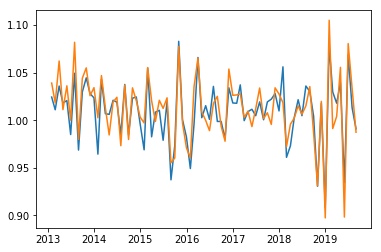

In [475]:
plt.plot(data_sp['benchmark_return'])
plt.plot(data_sp['portfolio_return'])

plt.show()

In [451]:
copy = data_sp.copy()


In [394]:
y_1 = np.cumprod(data_sp['portfolio_return'].values, axis=0)

In [395]:
y_2 = np.cumprod(data_sp['benchmark_return'].values, axis=0)

In [396]:
x = time_list
len(x)

7

In [397]:
d = pd.date_range(start='1/1/2013', end='08/31/2019', freq='MS')    

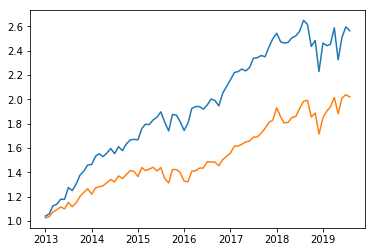

In [398]:
plt.plot(list(d),y_1)
plt.plot(list(d),y_2)
plt.show()

## Conduct regression analysis

In [399]:
tb = pd.read_csv('TB1YR.csv')
tb['TB1YR'] = tb['TB1YR']/100
tb.head()

,DATE,TB1YR
0,2013-01-01,0.0014
1,2013-02-01,0.0015
2,2013-03-01,0.0014
3,2013-04-01,0.0012
4,2013-05-01,0.0011


In [400]:
tb = list(tb['TB1YR'].values)[1:]
tb.append(0.0191)
tb.append(0.0191)
len(tb)

80

In [401]:
data_sp = data_sp.reset_index()
data_sp['tb'] = pd.Series(tb)
data_sp.head()

,Date,benchmark_return,portfolio_return,tb
0,2013-01-31,1.024405,1.039143,0.0015
1,2013-02-28,1.011061,1.018295,0.0014
2,2013-03-31,1.035988,1.062293,0.0012
3,2013-04-30,1.018086,1.011207,0.0011
4,2013-05-31,1.020763,1.036232,0.0014


In [402]:
data_sp['benchmark_return'] -= 1
data_sp['portfolio_return'] -= 1
data_sp.head()

,Date,benchmark_return,portfolio_return,tb
0,2013-01-31,0.024405,0.039143,0.0015
1,2013-02-28,0.011061,0.018295,0.0014
2,2013-03-31,0.035988,0.062293,0.0012
3,2013-04-30,0.018086,0.011207,0.0011
4,2013-05-31,0.020763,0.036232,0.0014


In [403]:
data_sp['benchmark_return_excess'] = data_sp['benchmark_return']-data_sp['tb']
data_sp['portfolio_return_excess'] = data_sp['portfolio_return']-data_sp['tb']
data_sp.head()

,Date,benchmark_return,portfolio_return,tb,benchmark_return_excess,portfolio_return_excess
0,2013-01-31,0.024405,0.039143,0.0015,0.022905,0.037643
1,2013-02-28,0.011061,0.018295,0.0014,0.009661,0.016895
2,2013-03-31,0.035988,0.062293,0.0012,0.034788,0.061093
3,2013-04-30,0.018086,0.011207,0.0011,0.016986,0.010107
4,2013-05-31,0.020763,0.036232,0.0014,0.019363,0.034832


In [404]:
data_sp['constant'] = 1
data_sp.head()

,Date,benchmark_return,portfolio_return,tb,benchmark_return_excess,portfolio_return_excess,constant
0,2013-01-31,0.024405,0.039143,0.0015,0.022905,0.037643,1
1,2013-02-28,0.011061,0.018295,0.0014,0.009661,0.016895,1
2,2013-03-31,0.035988,0.062293,0.0012,0.034788,0.061093,1
3,2013-04-30,0.018086,0.011207,0.0011,0.016986,0.010107,1
4,2013-05-31,0.020763,0.036232,0.0014,0.019363,0.034832,1


In [409]:
#data_sp = data_sp.set_index('Date')
data_sp = data_sp.applymap(lambda x: x*100)
data_sp.head()

,benchmark_return,portfolio_return,tb,benchmark_return_excess,portfolio_return_excess,constant
Date,,,,,,
2013-01-31,2.440471,3.914332,0.15,2.290471,3.764332,100
2013-02-28,1.106065,1.829534,0.14,0.966065,1.689534,100
2013-03-31,3.598772,6.229326,0.12,3.478772,6.109326,100
2013-04-30,1.808577,1.120665,0.11,1.698577,1.010665,100
2013-05-31,2.076281,3.623236,0.14,1.936281,3.483236,100


In [410]:
data_sp['constant'] = 1

In [411]:
import statsmodels.formula.api as smf

In [459]:
model = smf.ols(formula = "portfolio_return_excess ~ benchmark_return_excess", data = data_sp)
#print (i)
fit = model.fit()
print (fit.summary())

                               OLS Regression Results                              
Dep. Variable:     portfolio_return_excess   R-squared:                       0.807
Model:                                 OLS   Adj. R-squared:                  0.805
Method:                      Least Squares   F-statistic:                     326.6
Date:                     Wed, 14 Aug 2019   Prob (F-statistic):           1.31e-29
Time:                             11:40:48   Log-Likelihood:                -153.90
No. Observations:                       80   AIC:                             311.8
Df Residuals:                           78   BIC:                             316.6
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [427]:
model = smf.ols(formula = "portfolio_return ~ benchmark_return", data = data_sp)
#print (i)
fit = model.fit()
print (fit.summary())

                            OLS Regression Results                            
Dep. Variable:       portfolio_return   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     277.6
Date:                Wed, 14 Aug 2019   Prob (F-statistic):           2.06e-27
Time:                        10:50:53   Log-Likelihood:                -153.82
No. Observations:                  80   AIC:                             311.6
Df Residuals:                      78   BIC:                             316.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3368      0.195  

### Check regression assumption
- check linearity
    - plot a residual graph (1.observed vs predicted graph  2.residual vs predicted graph)
         
    - use rainbow test(The null hypothesis is that model is linear)
    
    
- check nomality of error term
    - plot QQ plot
    - Use Jarque_Bera(JB) test (The null hypothesis is that data follows normal distribution)
    
    
- check heteroskedasticity
    - Breusch-Pagan test(The null hypothesis is that residual has equal variance over time)
    
    
- check serial correlation
    - Durbin Watson test(The null hypothesis of the test is that there is no serial correlation)

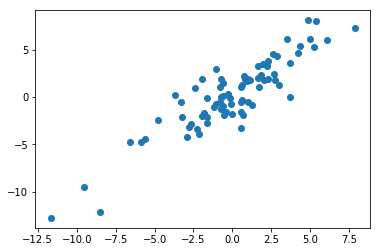

In [465]:
plt.scatter(data_sp['benchmark_return_excess'],data_sp['portfolio_return_excess'])
#plt.scatter(data_sp['benchmark_return_excess'])
plt.show()

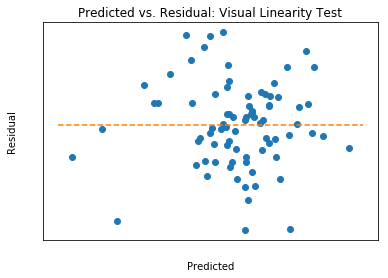

In [436]:
#check linearity by ploting residual graph
pred_val = fit.fittedvalues.copy()
true_val = data_sp['portfolio_return_excess'].values.copy()
residual = true_val - pred_val

plt.plot(pred_val,residual,'o')
plt.xlabel('Predicted')#,color='white')
plt.ylabel('Residual')#,color='white')
plt.title('Predicted vs. Residual: Visual Linearity Test')#,color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
abline(0,0)
plt.show()

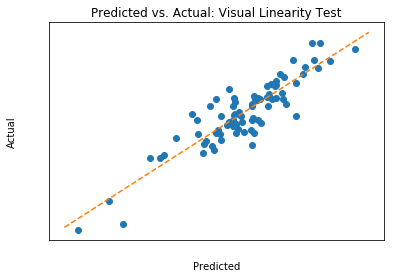

In [429]:
#check linearity by ploting residual graph

pred_val = fit.fittedvalues.copy()
true_val = data_sp['portfolio_return_excess'].values.copy()
residual = true_val - pred_val

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

plt.plot(pred_val,true_val,'o')
plt.xlabel('Predicted')#,color='white')
plt.ylabel('Actual')#,color='white')
plt.title('Predicted vs. Actual: Visual Linearity Test')#,color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
abline(1,0)
plt.show()

In [463]:
pred_val[:5]

Date
2013-01-31    2.627053
2013-02-28    1.288698
2013-03-31    3.827869
2013-04-30    2.028925
2013-05-31    2.269133
dtype: float64

In [464]:
true_val[:5]

array([3.76433245, 1.68953416, 6.10932563, 1.01066464, 3.48323578])

In [446]:
#use rainbow test to check linearity
from statsmodels.stats.diagnostic import linear_rainbow
t_value ,p_value= linear_rainbow(fit)
print(linear_rainbow(fit))
print('The p value is '+str(p_value))

(1.4704222335505046, 0.11752362709452792)
The p value is 0.11752362709452792


- check normality of error term

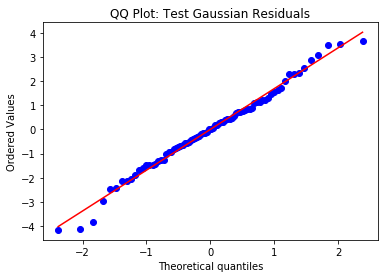

In [424]:
#check normality of error term
pred_val = fit.fittedvalues.copy()
true_val = data_sp['portfolio_return_excess'].values.copy()
residual = true_val - pred_val


stats.probplot(residual, dist="norm", plot=pylab) 
pylab.title('QQ Plot: Test Gaussian Residuals') 
pylab.show()

#fig, ax = plt.subplots(figsize=(6,2.5))
#a, (b, c, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [450]:
from scipy import stats

jbtest, p_value = stats.jarque_bera(residual)

print('p value is ',str(p_value))

p value is  0.8954884173920603


- check Heteroskedasticity

In [425]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(resid = residual.values,exog_het = data_sp[['portfolio_return_excess','constant']].values)
#lm, lm_pvalue, fvalue, f_pvalue = het_white(resid = residual.values,exog =  data_sp[['portfolio_return_excess','constant']].values)
print ('the p-value for the lagrange multiplier test statistic is %f' % (lm_pvalue))

the p-value for the lagrange multiplier test statistic is 0.243248


- check serial correlation

In [456]:
from statsmodels.stats.stattools import durbin_watson

db_value = durbin_watson(residual)
print('DW test is '+str(db_value))

DW test is 2.133571156300886


In [458]:
model = smf.ols(formula = "portfolio_return ~ benchmark_return", data = data_sp)
#print (i)
fit = model.fit()
print (fit.summary())

                            OLS Regression Results                            
Dep. Variable:       portfolio_return   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     277.6
Date:                Wed, 14 Aug 2019   Prob (F-statistic):           2.06e-27
Time:                        11:40:26   Log-Likelihood:                -153.82
No. Observations:                  80   AIC:                             311.6
Df Residuals:                      78   BIC:                             316.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3368      0.195  

### Plot graph